In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from IPython.display import display
pd.set_option('display.max_columns', None)

In [3]:
path = r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/02-Data/02-Prepared_Data/'

In [4]:
ic_df = pd.read_pickle(os.path.join(path,'ords_prods_custs_4.9.pkl'))

In [5]:
ic_df.shape

(32404859, 28)

There are some outliers, that were discovered when looking at the prices. Currently, we have no way to infer bette information about those records, so they will be removed.


In [6]:
condition = ((ic_df['product_name'].isin(['2 % Reduced Fat  Milk', 'Lowfat 2% Milkfat Cottage Cheese'])) & (ic_df['prices']>100))
ic_df = ic_df.loc[~condition]

In [7]:
ic_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,8.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,13.7,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119


### Crosstab  
In data analysis, a crosstab (short for cross-tabulation) is used to summarize and analyze the relationship between two or more categorical variables. It displays the frequency or count of observations that fall into various combinations of categories. Crosstabs are particularly useful for exploring patterns and dependencies between variables.

For example, let's say we have a dataset containing information about students' exam scores and their study habits. We can create a crosstab using pandas to examine the relationship between the variables "Study Hours" (categorized as "Low", "Medium", and "High") and "Exam Outcome" (categorized as "Pass" and "Fail").  

The resulting crosstab would show the frequency of students who passed or failed the exam based on their study hours.  

Overall, crosstabs are valuable tools for exploring relationships and identifying trends between categorical variables in a dataset.

In [8]:
crosstab = pd.crosstab(ic_df['days_since_last_order'], ic_df['order_number'], dropna=False)

In [9]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
days_since_last_order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1.0,2075745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.0,0,20534,20437,17981,16435,16044,14384,13889,12772,11459,11783,9827,9436,8960,8433,8129,7848,7747,7038,6901,7082,6423,6169,6102,6031,5541,6047,5568,5201,5684,4811,5133,4630,4535,4551,4384,4314,4092,3863,4028,4056,3825,3676,3669,3226,3519,3326,2720,3164,2634,2482,2928,2624,2522,2378,2483,2374,2221,2353,2195,2069,2247,1856,2031,1585,2127,1939,1870,1560,1672,1700,1573,1731,1555,1340,1537,1526,1422,1369,1184,1306,1195,1148,1490,1343,1358,1138,1176,1177,1195,1148,1039,937,1134,1099,1041,882,1037,935
1.0,0,31669,29942,28003,27086,25529,24994,22917,21779,21061,21259,19515,19108,18279,18540,18126,16762,15974,15509,15124,15180,13854,13617,13227,12859,13004,12936,11959,12524,12081,11748,11580,10867,10392,9694,9688,9759,9501,9562,9454,8644,8872,8712,8575,8440,8323,8482,8199,7708,7146,7711,6976,6525,7030,7111,6250,6438,6265,5896,5850,5597,5947,4934,5725,4852,4947,5263,4674,4568,4691,4123,4402,4221,4229,4013,3918,4106,3995,3596,4131,3517,3148,3457,3288,3245,3106,2970,2693,3027,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46446,46261,43895,40721,40898,38094,37515,35743,33826,33360,31471,30601,30252,28620,27569,26684,26232,25606,23714,23521,23976,23043,22333,21830,21596,20645,19774,18952,19238,18731,18329,17107,17532,16378,16018,16446,16093,15565,14661,14448,14343,13395,12919,12939,12891,12061,13442,12347,11729,11714,10604,10570,10813,10214,9492,9709,9349,8823,8732,8962,8179,8185,7711,7416,7756,7337,7038,7148,6622,6734,6386,6288,5951,5709,5629,5221,5056,5068,4703,4924,4386,4801,4658,3945,3937,4074,4204,3474,3622,3555,3314,3589,3319,3071,2984,3057,3090,2608
3.0,0,61623,63377,59981,57870,56174,52856,49285,48288,47816,45022,42988,42111,40696,38427,37938,35930,34657,34382,32640,32389,31473,30676,29428,28997,28248,26462,27081,25743,23417,23591,24473,23816,22224,21862,21326,20609,20803,19499,20906,18542,17950,17427,16905,16365,16421,15506,15539,14238,14976,13642,13554,12915,12214,11580,11838,11203,10569,10600,9896,10057,9836,9018,9230,8344,7926,7889,7420,7947,7220,6659,6834,6267,6272,6432,6069,5437,5167,5425,4883,5007,4557,4436,3798,4245,4005,3915,3359,3572,3318,3237,2799,3071,2902,2635,2657,2462,2168,2467
4.0,0,76715,78843,73525,70507,66553,62391,61129,59484,57686,54718,51931,48767,46890,45832,44235,42114,41270,39397,37319,36512,36472,35899,33125,34152,31336,31034,30092,28528,27016,26951,26007,24435,24651,23962,23042,22937,21583,20791,19013,19388,19325,18764,18716,18090,16584,16186,15562,15001,14199,13799,13030,12912,12017,11648,11927,11596,10289,9863,9640,9026,8713,8570,7753,8195,7316,6611,6331,6114,6465,6384,5589,5320,4985,5208,4347,4793,4440,4184,4229,3868,3985,3443,3224,2843,2860,2583,2710,2630,2341,2260,2490,2031,1800,2083,1917,1792,1695,1809
5.0,0,88987,91727,86484,81846,77574,73574,70001,64458,63140,59447,55533,53527,52951,49269,46958,47006,44876,42057,40772,40186,37702,35495,36138,34788,32266,31854,29636,29400,29373,27821,26068,25944,24194,23068,22117,21225,20016,19594,20513,18732,17596,16946,15596,15483,14349,14079,13319,13483,11453,12043,11737,10809,10348,10180,9077,8716,8577,7677,7876,6733,6395,6565,5756,5377,5299,4610,5506,5065,4395,4117,4276,3544,3440,3245,3197,2487,2725,2745,2816,2288,2303,2138,2098,2371,2002,1945,1566,1462,1630,1630,1367,983,1215,1220,1166,964,912,936
6.0,0,120668,122853,114633,106751,100749,95933,89741,87189,78622,78888,74706,68641,65116,62368,58776,56460,54782,53247,51284,49393,46

We can copy and paste the crosstab into excel:

In [10]:
crosstab.to_clipboard()

## Task 4.10

3) The Instacart officers are interested in comparing customer behavior in different geographic areas.  
Create a regional segmentation of the data.

In [11]:
# display all columns of the dataframe
pd.set_option('display.max_columns', None)

In [12]:
us_state_regions = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'South',
    'District of Columbia': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'South',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

In [13]:
# mapping the state to region
ic_df['region'] = ic_df['state'].map(us_state_regions)

In [14]:
ic_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,8.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,13.7,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West


In [15]:
ic_df.shape

(32399732, 29)

In [16]:
crosstab_region_to_spending_flag = pd.crosstab(ic_df['region'], ic_df['spending_flag'], dropna=False)

In [17]:
# relative frequency of highspenders per region
crosstab_region_to_spending_flag['high_spender_percentage'] = crosstab_region_to_spending_flag['high_spender'] / (crosstab_region_to_spending_flag['low_spender'] + crosstab_region_to_spending_flag['high_spender'])

crosstab_region_to_spending_flag['high_spender_percentage'] = crosstab_region_to_spending_flag['high_spender_percentage'].map("{:.3f}%".format)

In [18]:
crosstab_region_to_spending_flag

spending_flag,high_spender,low_spender,high_spender_percentage
region,,,
Midwest,154715,7441350,0.020%
Northeast,107381,5614511,0.019%
South,207902,10582194,0.019%
West,159120,8132559,0.019%


We can see that each region has rougly the same ratio of "high_spenders" to the total orders in that region.

4) The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.  
Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.  
Make sure you export this sample.

In [19]:
ic_df.head()
# ic_df.shape

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,8.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,13.7,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West


To answer this question we need to understand the granularity of this dataset. Each row represent one order, and one user can potentially has multiple orders recorded in our dataset.  
For each new order of the same user, the variable `order_number` is incremented by 1. Therefore the total number of orders for one single user is the max value of the `order_number` varibale for that user.  
The strategy is therefore to groupby `user_id` and take the max value of the `order_number` variable.  

This derived dataframe will be saved as `active_customers_list`.

In [20]:
max_order = ic_df.groupby('user_id')['order_number'].max().reset_index()
max_order
# max_order.shape

,user_id,order_number
0,1,10
1,10,5
2,100,5
3,1000,7
4,10000,72
...,...,...
206204,99995,5
206205,99996,12
206206,99997,3
206207,99998,5


In [21]:
# keep only those with order_number >= 5
active_users = max_order[max_order['order_number'] >= 5]
active_users

,user_id,order_number
0,1,10
1,10,5
2,100,5
3,1000,7
4,10000,72
...,...,...
206203,99994,11
206204,99995,5
206205,99996,12
206207,99998,5


In [22]:
# merge the dataframe so to keep only those rows whose 'user_id' is present in the 'active_users' dataframe
df_full_customers = pd.merge(ic_df, active_users[['user_id']], on = 'user_id', how = 'inner')

In [23]:
df_full_customers.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,8.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,13.7,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West


5) The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

I will first include the department into the active_customer dataframe

In [24]:
departments = pd.read_csv(os.path.join(path,'departments_wrangled.csv'), delimiter=',')

In [25]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [26]:
# name the columns
departments.columns = ['id', 'department']

In [27]:
# set the id column to be the pandas' index
departments.set_index('id', inplace=True)

In [28]:
departments.head(3)

,department
id,
1,frozen
2,other
3,bakery


In [29]:
df_full_customers.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West


In [30]:
# merge the two datasets so merge_active_custs includes department name for the product
merge_active_custs = pd.merge(df_full_customers, departments, left_on='department_id', right_on='id', indicator=True, how = 'left')

In [31]:
# verify the merge
merge_active_custs.value_counts('_merge')

_merge
both          30959687
left_only            0
right_only           0
Name: count, dtype: int64

In [32]:
# remove the column generated by the indicator 
merge_active_custs.drop(columns='_merge', inplace=True)

In [33]:
merge_active_custs.shape

(30959687, 30)

Now we can proceed with customer profiling:

1) We will classify the user as belongin to "lower class", "middle class", or "upper class" based on the number of dependant and per-capita income according to the following scheme:  
 1. Lower class: Per capita income ≤ 25,000
 2. Middle class: 25,000 < Per capita income ≤ 45,000  
 3. Upper class: Per capita income > 45,000  

The formula for per capita income is $ \text{per capita income} = \frac{\text{income}}{\text{number of dependents} + 1} $


In [34]:
def per_capita_income(row):
    return  float(row['income'] / (row['num_of_dependants'] + 1))

In [35]:
# create a new column "per-capita income"
merge_active_custs['Per-Capita_Income'] = merge_active_custs.apply(per_capita_income, axis=1)

In [36]:
merge_active_custs.head(2)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region,department,Per-Capita_Income
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,dairy eggs,24529.75
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,produce,24529.75


In [37]:
#create "socio-economic_class" column
merge_active_custs.loc[merge_active_custs['Per-Capita_Income'] <= 25_000, 'socio-economic_class' ] = 'lower_class'
merge_active_custs.loc[(merge_active_custs['Per-Capita_Income'] > 25_000) & (merge_active_custs['Per-Capita_Income'] <= 45_000), 'socio-economic_class'] = 'middle_class'
merge_active_custs.loc[merge_active_custs['Per-Capita_Income'] > 45_000, 'socio-economic_class'] = 'upper_class'

In [38]:
merge_active_custs.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region,department,Per-Capita_Income,socio-economic_class
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,dairy eggs,24529.75,lower_class
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,produce,24529.75,lower_class
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,8.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,13.7,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class


Another classification will be the "household_profile" to better understand the social status of our users:  
1. Young Singles/Couples (No Dependents): Users aged below 35 with no dependants  
2. Young Families (With Dependents): Users aged below 35 with one or more dependants
3. Middle-Aged Adults (With/Without Dependents): Users aged between 35 and 55 with/without dependants
4. Seniors (With/Without Dependents): Users aged above 55 with/without dependants 

In [39]:
# helper function to make classification
def classify_houseold(row):
    if row['age'] < 35 and row['num_of_dependants'] == 0:
        return "Young_Single"
    elif row['age'] < 35 and row['num_of_dependants'] >= 1:
        return "Young_Family"
    elif row['age'] >= 35 and row['age'] <= 55 and row['num_of_dependants'] == 0:
        return "Mid_Aged_Single"
    elif row['age'] >= 35 and row['age'] <= 55 and row['num_of_dependants'] >= 1:
        return "Mid_Aged_Family"
    elif row['age'] > 55 and row['num_of_dependants'] == 0:
        return "Senior_Single"
    elif row['age'] > 55 and row['num_of_dependants'] >= 1:
        return "Senior_Family"
    else:
        return "No Household Info"

In [40]:
# create new column with household profile
merge_active_custs['household_profile'] = merge_active_custs.apply(classify_houseold, axis = 1)

In [41]:
merge_active_custs.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region,department,Per-Capita_Income,socio-economic_class,household_profile
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,dairy eggs,24529.75,lower_class,Senior_Family
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,produce,24529.75,lower_class,Senior_Family
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family


In [42]:
# add column 'isweekend' to identify whether an order was placed on a weekend (1) or weekday (0)
merge_active_custs['is_weekend'] = merge_active_custs['orders_day_of_week'].isin([0,1]).astype('int')
merge_active_custs.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region,department,Per-Capita_Income,socio-economic_class,household_profile,is_weekend
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,dairy eggs,24529.75,lower_class,Senior_Family,0
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,produce,24529.75,lower_class,Senior_Family,0
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,0
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,8.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,0
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,13.7,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,0


Let's now create a segmentation to better understand shopping habits:  
1. Weekend Shopper: users who mostly make purchase on weekends
2. Weekday Shopper: users who mostly make purchase on weekdays
3. Balanced Shopper: user without a dominant purchase habit

In [43]:
# as_index=False avoid the user_id column to become the index after grouping
df_shop_habits = merge_active_custs.groupby('user_id', as_index=False)['is_weekend'].agg(total_orders='count', total_orders_weekend='sum')
df_shop_habits['total_orders_weekday'] = df_shop_habits['total_orders'] - df_shop_habits['total_orders_weekend']
df_shop_habits

,user_id,total_orders,total_orders_weekend,total_orders_weekday
0,1,59,17,42
1,10,143,0,143
2,100,27,13,14
3,1000,103,44,59
4,10000,1092,504,588
...,...,...,...,...
162626,99994,164,12,152
162627,99995,50,22,28
162628,99996,128,50,78
162629,99998,21,16,5


In [44]:
# create two new varibales to show the proportion of weekend and weekday orders made by each user
df_shop_habits['proportion_weekend'] = (df_shop_habits['total_orders_weekend']  / df_shop_habits['total_orders']).round(2)
df_shop_habits['proportion_weekday'] = (df_shop_habits['total_orders_weekday']  / df_shop_habits['total_orders']).round(2)
df_shop_habits

,user_id,total_orders,total_orders_weekend,total_orders_weekday,proportion_weekend,proportion_weekday
0,1,59,17,42,0.29,0.71
1,10,143,0,143,0.00,1.00
2,100,27,13,14,0.48,0.52
3,1000,103,44,59,0.43,0.57
4,10000,1092,504,588,0.46,0.54
...,...,...,...,...,...,...
162626,99994,164,12,152,0.07,0.93
162627,99995,50,22,28,0.44,0.56
162628,99996,128,50,78,0.39,0.61
162629,99998,21,16,5,0.76,0.24


The classification is based according to the followin criteria:  
- If the user made more than 60% of their order on weekends, then they are *weekend_shopper*  
- If the user made more than 60% of their order on weekdays, then they are *weekdat_shopper*  
- If neither, then there is not a dominant purchase habit we classify them as *balanced_shopper* 

In [45]:
df_shop_habits['shopper_type'] = 'balanced_shopper'
df_shop_habits.loc[df_shop_habits['proportion_weekend'] > 0.60, 'shopper_type'] = 'weekend_shopper'
df_shop_habits.loc[df_shop_habits['proportion_weekday'] > 0.60, 'shopper_type'] = 'weekday_shopper'

In [46]:
print('Total Rows:', df_shop_habits.shape[0])
df_shop_habits.head(3)

Total Rows: 162631


,user_id,total_orders,total_orders_weekend,total_orders_weekday,proportion_weekend,proportion_weekday,shopper_type
0,1,59,17,42,0.29,0.71,weekday_shopper
1,10,143,0,143,0.00,1.00,weekday_shopper
2,100,27,13,14,0.48,0.52,balanced_shopper


In [47]:
# remove the helper column previously created
merge_active_custs.drop(columns=['is_weekend'], inplace=True)

In [48]:
merge_active_custs.shape

(30959687, 33)

6) Create an appropriate visualization to show the distribution of profiles:
- Per-Capita Income
- Socio-Econmic Class
- Houselhold Profile
- Shoppper Type (weekday/weekend)

In [49]:
df_shop_habits

,user_id,total_orders,total_orders_weekend,total_orders_weekday,proportion_weekend,proportion_weekday,shopper_type
0,1,59,17,42,0.29,0.71,weekday_shopper
1,10,143,0,143,0.00,1.00,weekday_shopper
2,100,27,13,14,0.48,0.52,balanced_shopper
3,1000,103,44,59,0.43,0.57,balanced_shopper
4,10000,1092,504,588,0.46,0.54,balanced_shopper
...,...,...,...,...,...,...,...
162626,99994,164,12,152,0.07,0.93,weekday_shopper
162627,99995,50,22,28,0.44,0.56,balanced_shopper
162628,99996,128,50,78,0.39,0.61,weekday_shopper
162629,99998,21,16,5,0.76,0.24,weekend_shopper


In [50]:
df_userid = pd.merge(df_shop_habits, merge_active_custs[['user_id', 'Per-Capita_Income','socio-economic_class', 'household_profile']], on='user_id', how='left')

In [51]:
# remove the duplicates that happened due to the merge
df_userid.drop_duplicates(keep='first', inplace=True)

In [52]:
print(df_userid.shape)
df_userid.head()

(162631, 10)


,user_id,total_orders,total_orders_weekend,total_orders_weekday,proportion_weekend,proportion_weekday,shopper_type,Per-Capita_Income,socio-economic_class,household_profile
0,1,59,17,42,0.29,0.71,weekday_shopper,10105.75,lower_class,Young_Family
59,10,143,0,143,0.00,1.00,weekday_shopper,17572.00,lower_class,Young_Family
202,100,27,13,14,0.48,0.52,balanced_shopper,46247.00,upper_class,Senior_Family
229,1000,103,44,59,0.43,0.57,balanced_shopper,31790.50,middle_class,Young_Family
332,10000,1092,504,588,0.46,0.54,balanced_shopper,61257.00,upper_class,Young_Single


6) Create an appropriate visualization to show the distribution of profiles:
- Per-Capita Income
- Socio-Economic Class
- Houselhold Profile
- Shoppper Type (weekday/weekend)

/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


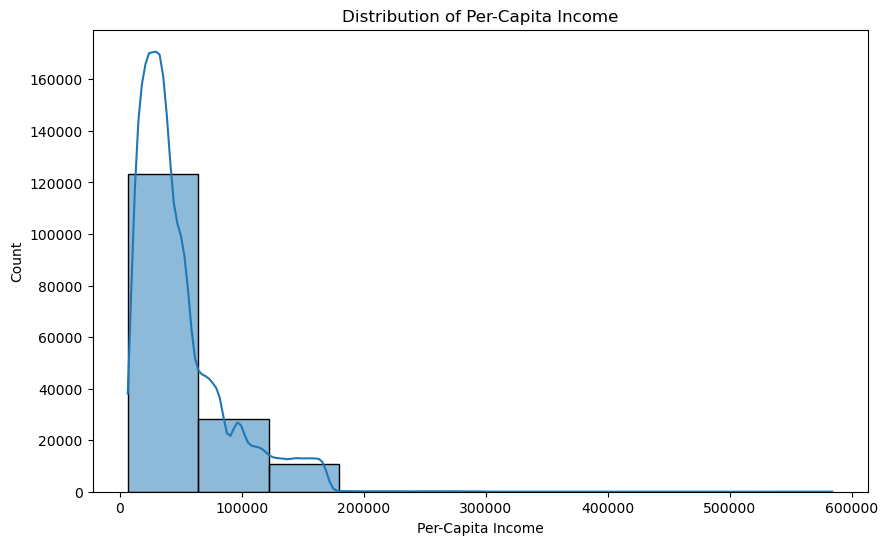

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_userid, x='Per-Capita_Income', bins=10, kde=True)
plt.title('Distribution of Per-Capita Income')
plt.xlabel('Per-Capita Income')
plt.ylabel('Count')
plt.show()

#### Socio-Economic Class

In [54]:
socio_count = df_userid.value_counts('socio-economic_class')

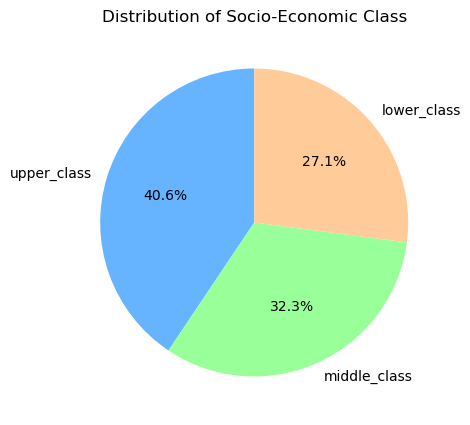

In [55]:
socio_count.plot.pie(
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start angle for better appearance
    colors=['#66b3ff','#99ff99','#ffcc99'],  # Set colors for the slices
    figsize=(5, 5),     # Set figure size
    title='Distribution of Socio-Economic Class'  # Set title
)

# Show the plot
plt.ylabel('')  # Hide the y-label
plt.show()

#### Household Profiles

In [56]:
household_counts = df_userid['household_profile'].value_counts()

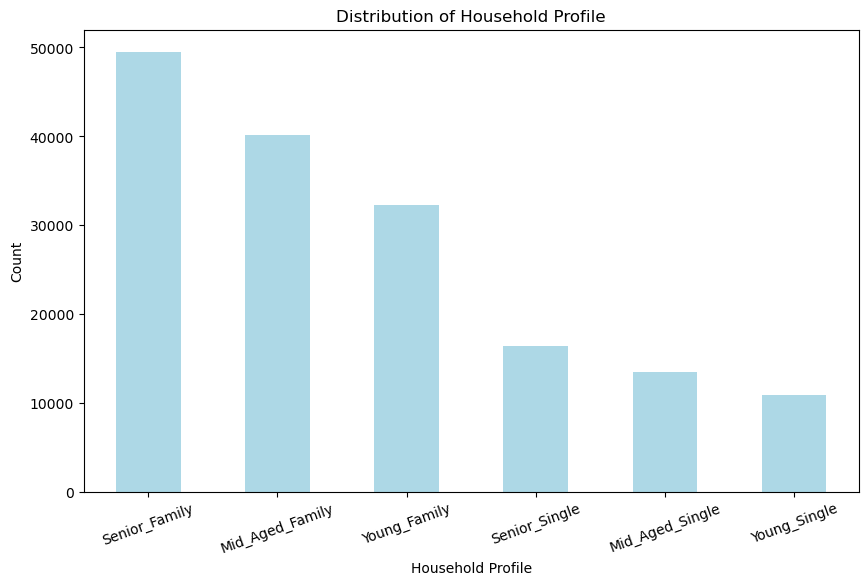

In [57]:
household_counts.plot.bar(
    color='lightblue',  # Set bar color
    figsize=(10, 6),  # Set figure size
    title='Distribution of Household Profile'  # Set title
)

# Add labels
plt.xlabel('Household Profile')
plt.ylabel('Count')
plt.xticks(rotation=20)  # Set x-ticks rotation

# Show the plot
plt.show()

#### Shopper Type Profiles

In [58]:
shopper_counts = df_userid['shopper_type'].value_counts()

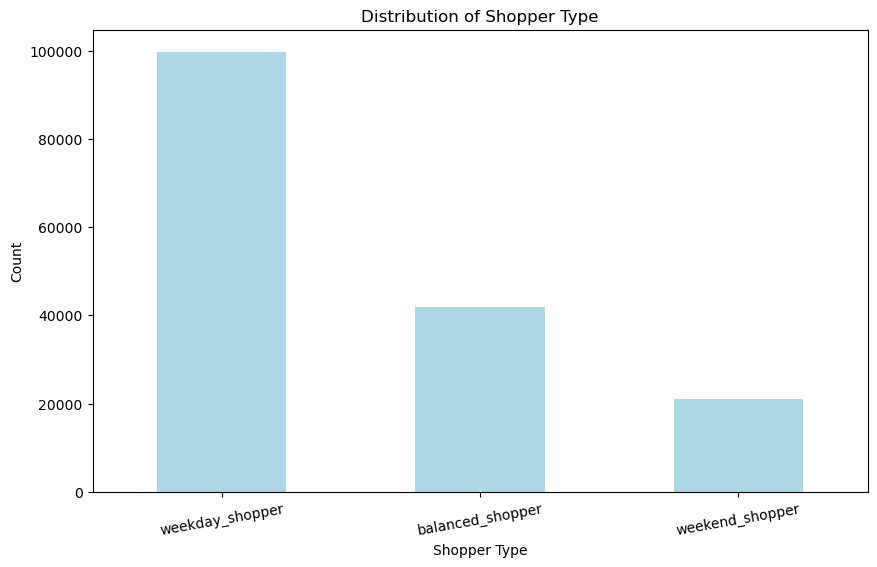

In [59]:
shopper_counts.plot.bar(
    color='lightblue',  # Set bar color
    figsize=(10, 6),  # Set figure size
    title='Distribution of Shopper Type'  # Set title
)

# Add labels
plt.xlabel('Shopper Type')
plt.ylabel('Count')
plt.xticks(rotation=10)  # Set x-ticks rotation

# Show the plot
plt.show()

7) Aggregate the `max`, `mean`, and `min` variables on a customer-profile level for usage frequency and expenditure.

In [60]:
usage_frequency = merge_active_custs.groupby('user_id').size().reset_index(name='usage_frequency') # size() consider NaN values as opposed to count()
usage_frequency

,user_id,usage_frequency
0,1,59
1,10,143
2,100,27
3,1000,103
4,10000,1092
...,...,...
162626,99994,164
162627,99995,50
162628,99996,128
162629,99998,21


In [61]:
expenditure = merge_active_custs.groupby('user_id')['prices'].sum().reset_index(name='expenditure')
expenditure

,user_id,expenditure
0,1,375.7
1,10,1237.1
2,100,266.2
3,1000,866.0
4,10000,8785.6
...,...,...
162626,99994,1394.8
162627,99995,397.9
162628,99996,948.6
162629,99998,190.1


In [62]:
merge_active_custs = pd.merge(merge_active_custs, usage_frequency, on='user_id')
merge_active_custs = pd.merge(merge_active_custs, expenditure, on='user_id')
merge_active_custs.shape

(30959687, 35)

In [63]:
agg_functions = {
    'usage_frequency': ['min', 'max', 'mean'],
    'expenditure': ['min', 'max', 'mean']
}
household_stats = merge_active_custs.groupby('household_profile').agg(agg_functions)

In [64]:
household_stats

usage_frequency                   expenditure           \
                              min   max        mean         min      max   
household_profile                                                          
Mid_Aged_Family                 5  2901  440.558210         7.0  22696.9   
Mid_Aged_Single                 5  2936  436.084529         5.0  20315.1   
Senior_Family                   2  3704  434.632409         6.8  26394.9   
Senior_Single                   5  3637  449.082030        15.7  24307.1   
Young_Family                    5  2577  443.720550        10.0  18448.1   
Young_Single                    5  2429  432.962532        10.5  18883.2   

                                
                          mean  
household_profile               
Mid_Aged_Family    3427.660893  
Mid_Aged_Single    3386.547009  
Senior_Family      3382.996319  
Senior_Single      3499.465204  
Young_Family       3448.326050  
Young_Single       3370.562345

In [65]:
# flatten the columns name
household_stats.columns = ['_'.join(col).strip() for col in household_stats.columns.values]

In [66]:
household_stats

,usage_frequency_min,usage_frequency_max,usage_frequency_mean,expenditure_min,expenditure_max,expenditure_mean
household_profile,,,,,,
Mid_Aged_Family,5,2901,440.558210,7.0,22696.9,3427.660893
Mid_Aged_Single,5,2936,436.084529,5.0,20315.1,3386.547009
Senior_Family,2,3704,434.632409,6.8,26394.9,3382.996319
Senior_Single,5,3637,449.082030,15.7,24307.1,3499.465204
Young_Family,5,2577,443.720550,10.0,18448.1,3448.326050
Young_Single,5,2429,432.962532,10.5,18883.2,3370.562345


8) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [67]:
agg_functions = {
    'prices': ['mean', 'size', 'min', 'max']
    }

region_household = merge_active_custs.groupby(['region','household_profile']).agg(agg_functions).reset_index()

In [68]:
# flatten the columns names
region_household.columns = ['region', 'household_profile', 'prices_mean', 'total_orders', 'lowest_price', 'highest_price']
region_household

,region,household_profile,prices_mean,total_orders,lowest_price,highest_price
0,Midwest,Mid_Aged_Family,7.794321,1816565,1.0,25.0
1,Midwest,Mid_Aged_Single,7.786973,618418,1.0,25.0
2,Midwest,Senior_Family,7.790459,2176341,1.0,25.0
3,Midwest,Senior_Single,7.782701,737439,1.0,25.0
4,Midwest,Young_Family,7.790185,1444869,1.0,25.0
5,Midwest,Young_Single,7.822075,466674,1.0,25.0
6,Northeast,Mid_Aged_Family,7.785594,1352526,1.0,25.0
7,Northeast,Mid_Aged_Single,7.765123,409963,1.0,25.0
8,Northeast,Senior_Family,7.789005,1672604,1.0,25.0
9,Northeast,Senior_Single,7.817072,560896,1.0,25.0


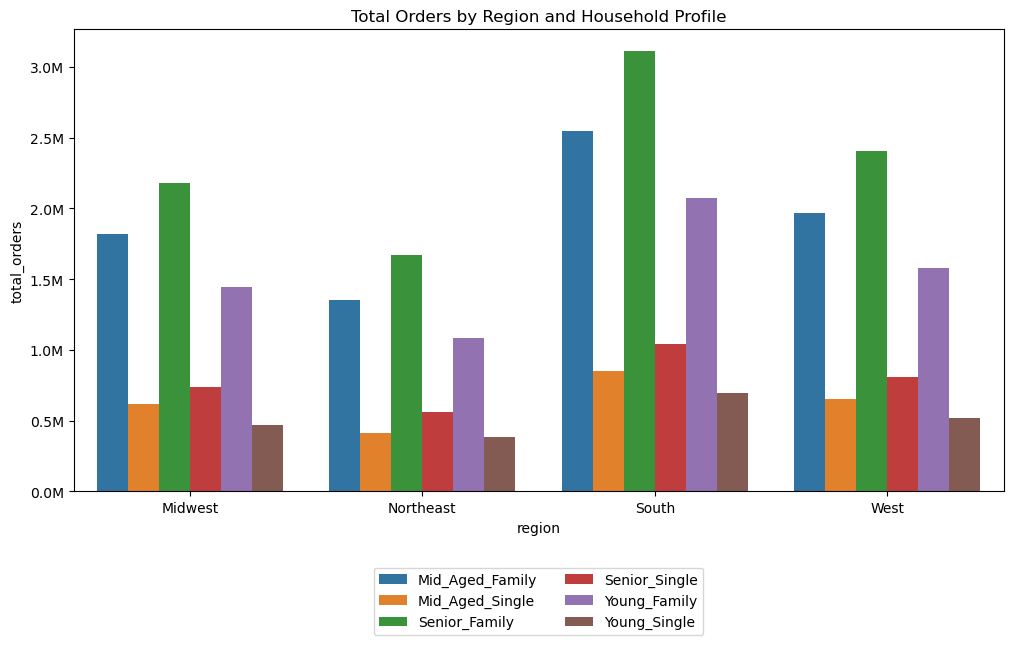

In [69]:
# Bar plot for total orders
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='region', y='total_orders', hue='household_profile', data=region_household)
plt.title('Total Orders by Region and Household Profile')

# Define a function to format the y-axis labels
def format_thousands(x, pos):
    return f'{x*1e-6:.1f}M'

# Apply the custom formatter to the y-axis
formatter = FuncFormatter(format_thousands)
bar_plot.yaxis.set_major_formatter(formatter)

# move legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()


In [70]:
agg_functions = {
    'prices': ['mean', 'min', 'max', 'size']
    }

In [71]:
dep_household = merge_active_custs.groupby(['department','household_profile']).agg(agg_functions).reset_index()

In [72]:
dep_household.columns = ['department', 'household_profile', 'prices_mean', 'prices_min', 'prices_max', 'count']

In [73]:
# save progress
# pd.to_pickle(merge_active_custs, os.path.join(path,'4.10.pkl'))
dep_household

,department,household_profile,prices_mean,prices_min,prices_max,count
0,alcohol,Mid_Aged_Family,8.204867,1.0,15.0,34151
1,alcohol,Mid_Aged_Single,7.981680,1.0,15.0,12920
2,alcohol,Senior_Family,8.163261,1.0,15.0,43093
3,alcohol,Senior_Single,8.020497,1.0,15.0,14246
4,alcohol,Young_Family,8.262832,1.0,15.0,30556
...,...,...,...,...,...,...
121,snacks,Mid_Aged_Single,4.274632,1.6,7.0,226333
122,snacks,Senior_Family,4.273703,1.6,7.0,833584
123,snacks,Senior_Single,4.274830,1.6,7.0,280124
124,snacks,Young_Family,4.278559,1.6,7.0,556245


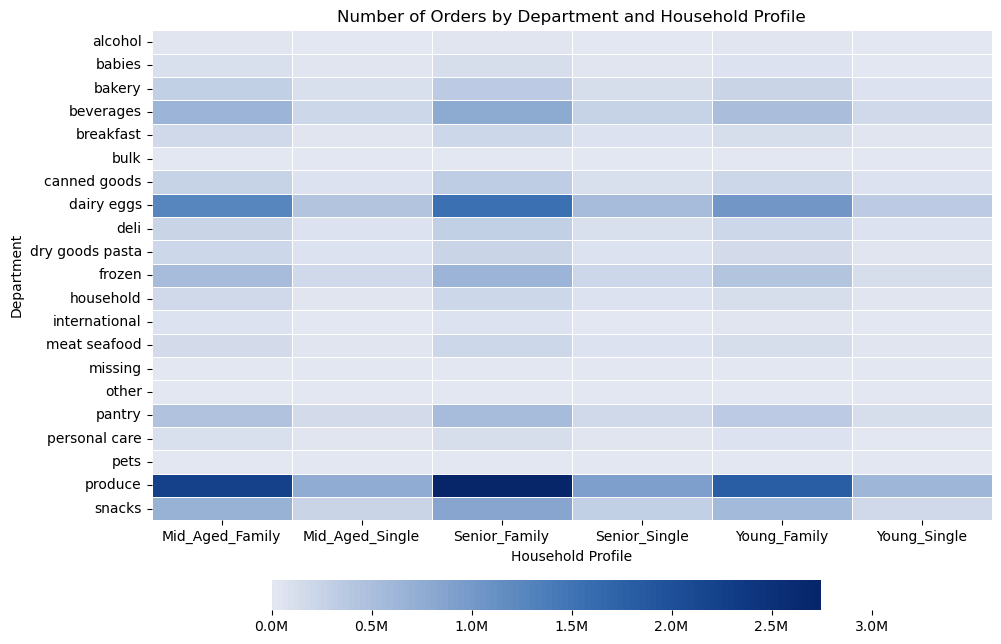

In [74]:
# Pivot the DataFrame
pivot_df = dep_household.pivot(index='department', columns='household_profile', values='count')

# Define a gradient of blue colors similar to Tableau's default palette
tableau_blue_colors = [
    "#E3E7F1", "#B5C6E0", "#8CA9D1", "#618CC1",
    "#396FB2", "#20539B", "#103A84", "#072569"
]

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list("tableau_blue_cmap", tableau_blue_colors, N=100)

# Plot with the custom Tableau blue color map
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_df, annot=False, fmt="d", cmap=cmap, linewidths=.5, cbar_kws={'orientation': 'horizontal'})

# Customize the plot
plt.title('Number of Orders by Department and Household Profile')
plt.xlabel('Household Profile')
plt.ylabel('Department')

# Remove scientific notation by formatting the annotations
for t in ax.texts:
    t.set_text(f'{int(float(t.get_text())):,}')

# Customize the color bar labels
colorbar = ax.collections[0].colorbar
tick_labels = [f'{tick / 1e6:.1f}M' for tick in colorbar.get_ticks()]
colorbar.set_ticks(colorbar.get_ticks())
colorbar.set_ticklabels(tick_labels)

#Adjust the layout to ensure the color bar spans the full width
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.2)
colorbar.ax.set_position([0.1, 0.32, 0.8, 0.03])  # [left, bottom, width, height]

# Show the plot
plt.show()

### Instacart Management Questions  

1) The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders. 


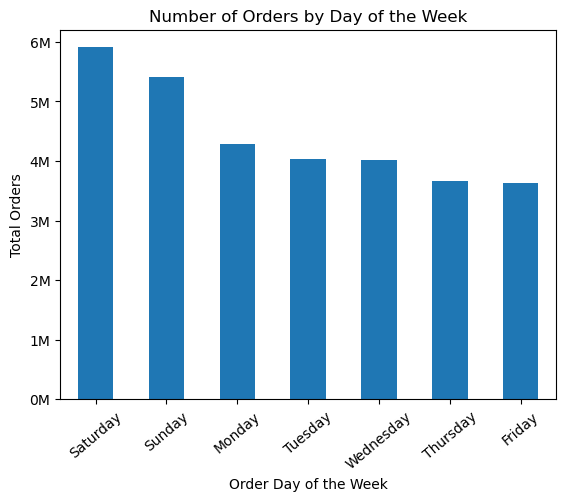

In [75]:
# function to format the y-axis
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'


ax = merge_active_custs['orders_day_of_week'].value_counts(dropna = False).plot.bar()

day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ax.set_xticklabels(day_names, rotation=40)
ax.set_xlabel('Order Day of the Week')
ax.set_ylabel('Total Orders')
ax.set_title('Number of Orders by Day of the Week')

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

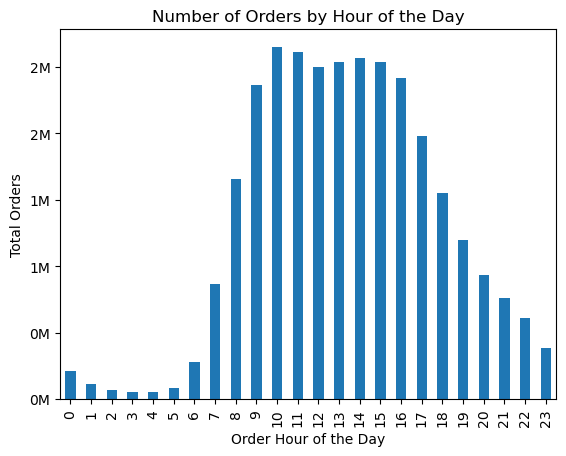

In [76]:
bar = merge_active_custs['order_hour_of_day'].value_counts(dropna=False).sort_index(ascending=True).plot.bar()
bar.set_xlabel('Order Hour of the Day')
bar.set_ylabel('Total Orders')
bar.set_title('Number of Orders by Hour of the Day')

bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

2) Are there any particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times. 


In [77]:
merge_active_custs.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region,department,Per-Capita_Income,socio-economic_class,household_profile,usage_frequency,expenditure
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,dairy eggs,24529.75,lower_class,Senior_Family,90,775.7
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,produce,24529.75,lower_class,Senior_Family,90,775.7
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,90,775.7
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,8.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,90,775.7
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,13.7,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,90,775.7


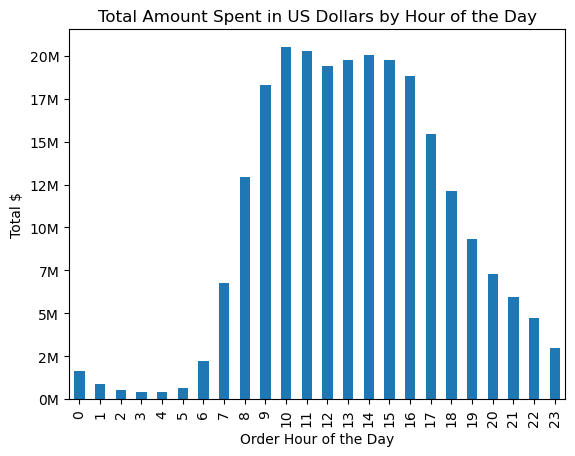

In [78]:

bar = merge_active_custs.groupby('order_hour_of_day')['prices'].sum().sort_index(ascending=True).plot.bar()
bar.set_xlabel('Order Hour of the Day')
bar.set_ylabel('Total $')
bar.set_title('Total Amount Spent in US Dollars by Hour of the Day')

bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

3) Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts. 


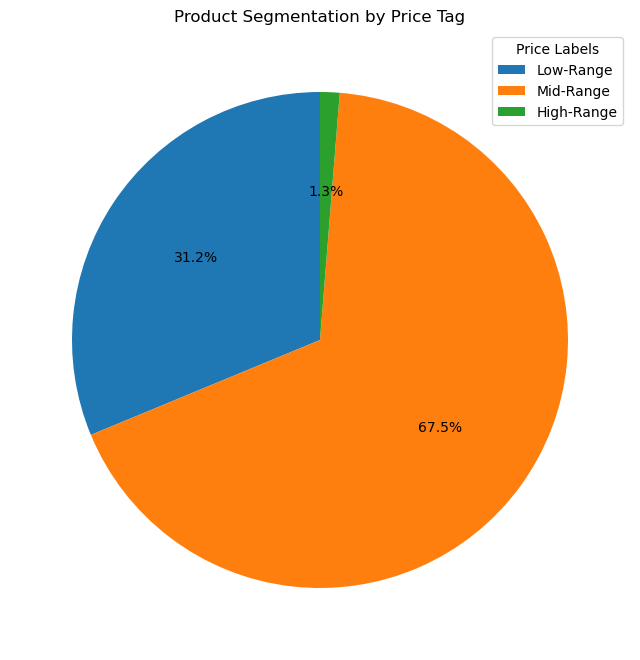

In [79]:
price_counts = merge_active_custs['price_label'].value_counts(dropna=False)
custom_order = ['Low-Range', 'Mid-Range', 'High-Range']
price_counts = price_counts.reindex(custom_order)
# Plot the pie chart
plt.figure(figsize=(8, 14))
wedges, texts, autotexts = plt.pie(price_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Product Segmentation by Price Tag')
plt.legend(wedges, price_counts.index, loc='upper right', title='Price Labels')


plt.show()

4) Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [80]:
merge_active_custs.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,region,department,Per-Capita_Income,socio-economic_class,household_profile,usage_frequency,expenditure
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,dairy eggs,24529.75,lower_class,Senior_Family,90,775.7
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,produce,24529.75,lower_class,Senior_Family,90,775.7
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,90,775.7
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,8.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,90,775.7
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,13.7,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,West,pantry,24529.75,lower_class,Senior_Family,90,775.7


In [81]:
merge_active_custs.groupby('department')['order_id'].count().sort_index()

department
alcohol             144627
babies              410392
bakery             1120828
beverages          2571901
breakfast           670850
bulk                 33451
canned goods       1012074
dairy eggs         5172305
deli               1003834
dry goods pasta     822136
frozen             2121731
household           699857
international       255991
meat seafood        674781
missing              64768
other                34411
pantry             1782705
personal care       424306
pets                 93060
produce            9079273
snacks             2766406
Name: order_id, dtype: int64

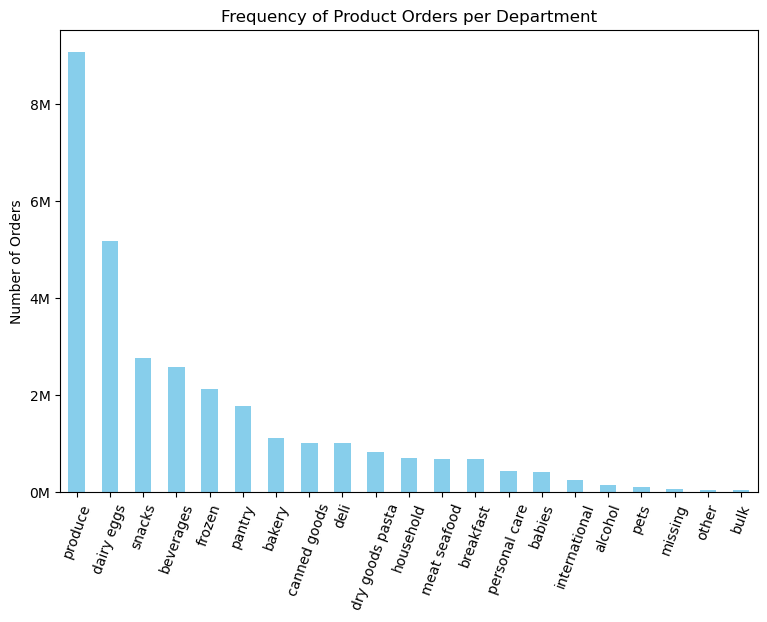

In [82]:
dpt_order_frequency = merge_active_custs.groupby('department')['order_id'].count().sort_values(ascending=False)

plt.figure(figsize=(9, 6))  # Adjust the figure size for better visibility
ax = dpt_order_frequency.plot(kind='bar', color='skyblue')  # Plot as a bar chart
plt.title('Frequency of Product Orders per Department')  # Set the title of the chart
plt.xlabel('')  # Remove x-axis title
plt.ylabel('Number of Orders')  # Label the y-axis
plt.xticks(rotation=70)  # Rotate the x-axis labels for better readability


# Function to format the y-axis
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'

# Apply the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()  # Display the plot


### 5) The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ.

In [83]:
merge_active_custs[['user_id', 'state', 'region', 'Per-Capita_Income', 'loyalty_flag','socio-economic_class','household_profile','usage_frequency', 'spending_flag', 'expenditure',\
    'product_name', 'department', 'busiest_period_of_day', ]]

,user_id,state,region,Per-Capita_Income,loyalty_flag,socio-economic_class,household_profile,usage_frequency,spending_flag,expenditure,product_name,department,busiest_period_of_day
0,202279,Idaho,West,24529.75,new_customer,lower_class,Senior_Family,90,low_spender,775.7,Organic Egg Whites,dairy eggs,average_orders
1,202279,Idaho,West,24529.75,new_customer,lower_class,Senior_Family,90,low_spender,775.7,Michigan Organic Kale,produce,average_orders
2,202279,Idaho,West,24529.75,new_customer,lower_class,Senior_Family,90,low_spender,775.7,Garlic Powder,pantry,average_orders
3,202279,Idaho,West,24529.75,new_customer,lower_class,Senior_Family,90,low_spender,775.7,Coconut Butter,pantry,average_orders
4,202279,Idaho,West,24529.75,new_customer,lower_class,Senior_Family,90,low_spender,775.7,Natural Sweetener,pantry,average_orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30959682,25247,Alaska,West,27437.50,regular_customer,middle_class,Senior_Family,250,low_spender,1720.2,Free & Clear Natural Dishwasher Detergent,household,average_orders
30959683,25247,Alaska,West,27437.50,regular_customer,middle_class,Senior_Family,250,low_spender,1720.2,Organic Mini Sandwich Crackers Peanut Butter,snacks,average_orders
30959684,25247,Alaska,West,27437.50,regular_customer,middle_class,Senior_Family,250,low_spender,1720.2,All Natural French Toast Sticks,frozen,average_orders
30959685,25247,Alaska,West,27437.50,regular_customer,middle_class,Senior_Family,250,low_spender,1720.2,Banana,produce,average_orders


### Grouping by Loyalty Status


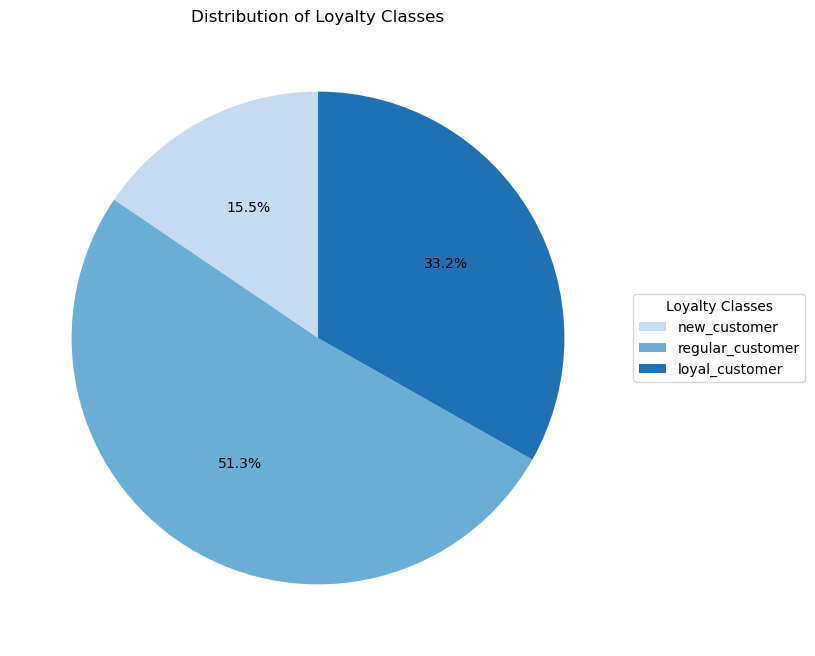

In [84]:
# Calculate the value counts for each loyalty class
loyalty_counts = merge_active_custs['loyalty_flag'].value_counts()

# Define the order for the loyalty classes
order = ['new_customer', 'regular_customer', 'loyal_customer']

# Reorder the loyalty counts based on the specified order
loyalty_counts = loyalty_counts.reindex(order)

# Define colors for the pie chart
colors = sns.color_palette("Blues", len(loyalty_counts))

# Map the colors to the loyalty classes based on actual unique values
color_mapping = {'new_customer': colors[0], 'regular_customer': colors[1], 'loyal_customer': colors[2]}


# Plot the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(loyalty_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=[color_mapping[label] for label in loyalty_counts.index])

# Set the title of the chart
plt.title('Distribution of Loyalty Classes')

# Add a legend with the loyalty classes and colors
plt.legend(wedges, loyalty_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title="Loyalty Classes")

# Show the plot
plt.show()

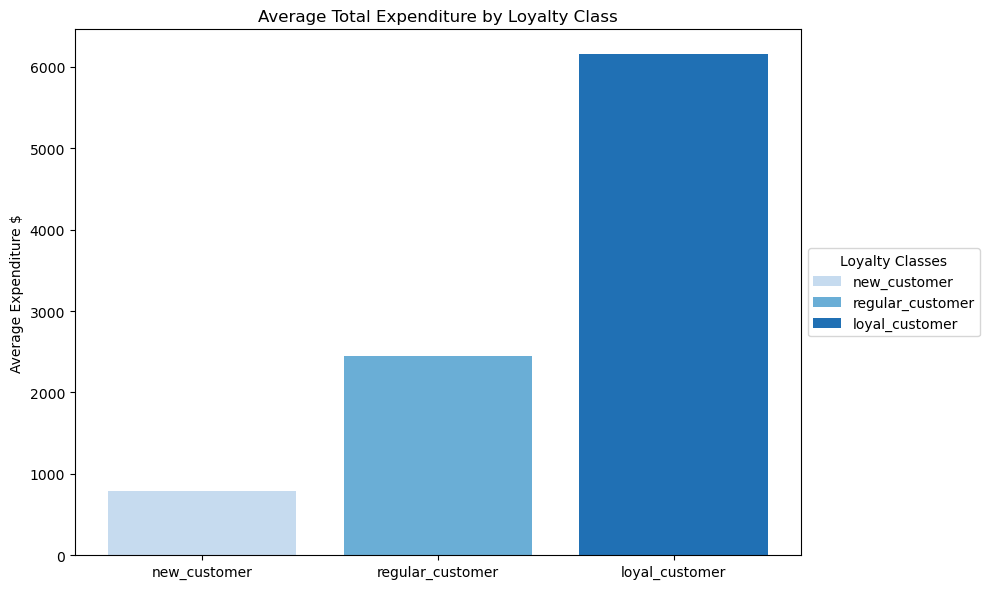

In [85]:
# Calculate the mean expenditure for each loyalty class
mean_expenditure = merge_active_custs.groupby('loyalty_flag')['expenditure'].mean()

# Define the order for the loyalty classes
order = ['new_customer', 'regular_customer', 'loyal_customer']

# Reorder the mean expenditure based on the specified order
mean_expenditure = mean_expenditure.reindex(order)

# Define colors shades for the bar chart in the desired order
colors = sns.color_palette("Blues", len(mean_expenditure))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_expenditure.index, mean_expenditure, color=colors)

# Set the title of the chart
plt.title('Average Total Expenditure by Loyalty Class')
# plt.xlabel('Loyalty Class')
plt.ylabel('Average Expenditure $')

# Add a legend with the loyalty classes and colors in the specified order, placed to the right
plt.legend(bars, mean_expenditure.index, loc='center left', bbox_to_anchor=(1, 0.5), title="Loyalty Classes")

# Show the plot
plt.tight_layout()
plt.show()




### Grouping By Region and Socio-Economic Class


In [86]:
# Calculate the size of each group
agg_data = merge_active_custs.groupby(['region', 'socio-economic_class'])['user_id'].size().unstack(fill_value=0)
print(agg_data)

socio-economic_class  lower_class  middle_class  upper_class
region                                                      
Midwest                   1713163       2415478      3131665
Northeast                 1294133       1821717      2348032
South                     2528319       3391994      4389129
West                      1952378       2604346      3369333


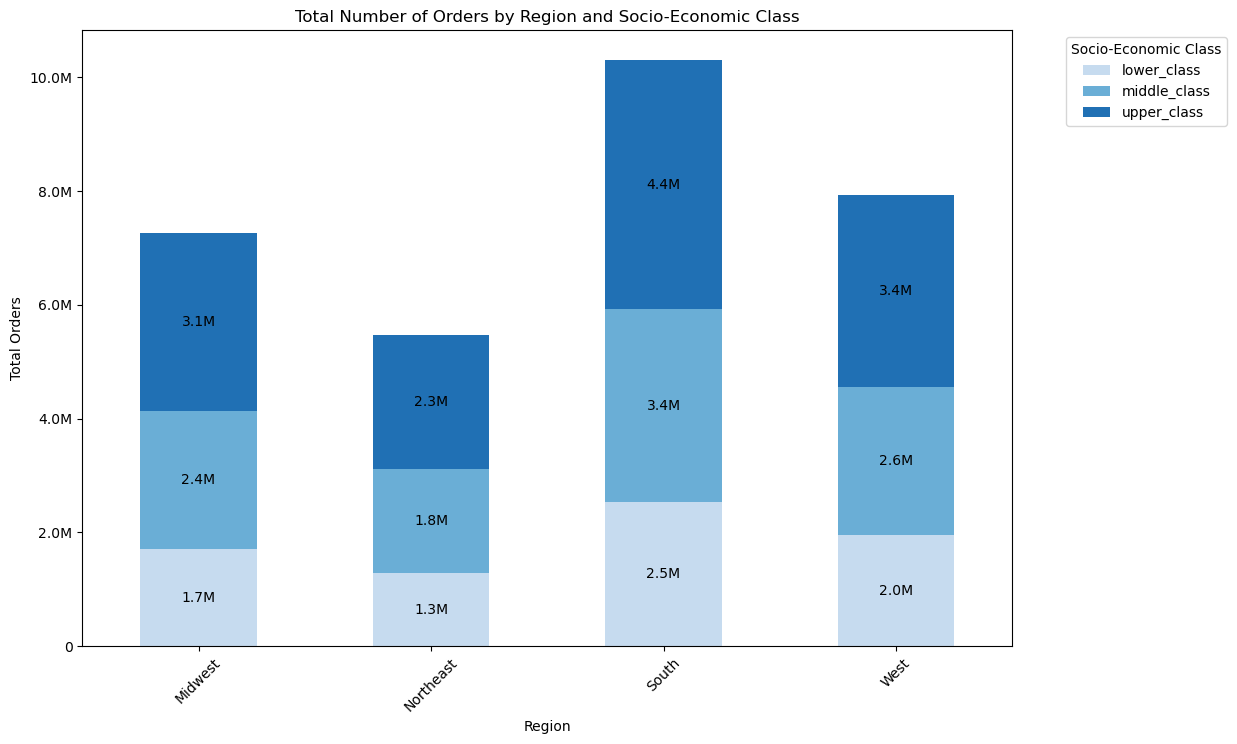

In [87]:
# Define the formatter function for the y-axis
def format_number(x, pos):
    if x >= 1e6:
        return f'{x * 1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x * 1e-3:.1f}K'
    else:
        return f'{x:.0f}'

formatter = FuncFormatter(format_number)

# Plot stacked bar chart
ax = agg_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=sns.color_palette("Blues", len(agg_data.columns)))
ax.yaxis.set_major_formatter(formatter)
plt.title('Total Number of Orders by Region and Socio-Economic Class')
plt.xlabel('Region')
plt.ylabel('Total Orders')
plt.legend(title='Socio-Economic Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# add labels inside stacked bars
def add_labels(containers):
    for container in containers:
        for rect in container:
            height = rect.get_height()
            if height > 0:  # Add this check to avoid labeling empty segments
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + rect.get_height() / 2,
                    format_number(height, None),
                    ha='center',
                    va='center'
                )

add_labels(ax.containers)
plt.xticks(rotation=45)
plt.show()

### Grouping by Household Profile

In [88]:
# Group by household profile
grouped = merge_active_custs.groupby('household_profile').agg({
    'order_id': 'count',
    'expenditure': 'mean',
    'orders_day_of_week': lambda x: x.mode()[0],
    'order_hour_of_day': lambda x: x.mode()[0]
}).reset_index()

grouped.columns = ['Household Profile', 'Total Orders', 'Avg Expenditure', 'Most Common Day', 'Avg Hour']

#### Number of Orders by Household Profile

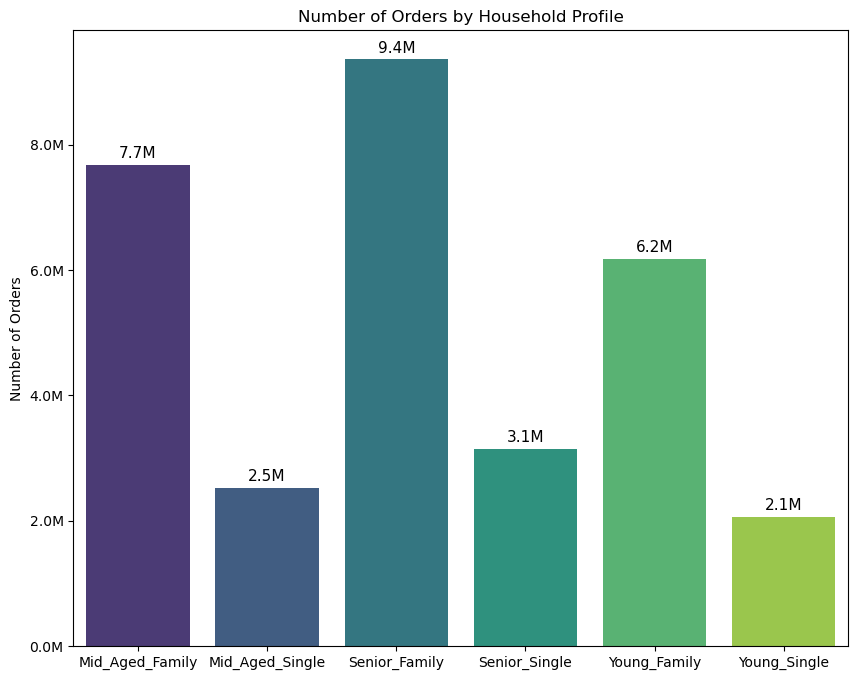

In [89]:
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'

# Plot Number of Orders by Household Profile
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=grouped, x='Household Profile', y='Total Orders', palette='viridis')
plt.title('Number of Orders by Household Profile')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis as millions

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height * 1e-6:.1f}M', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


#### Average Expenditure by Household Profile

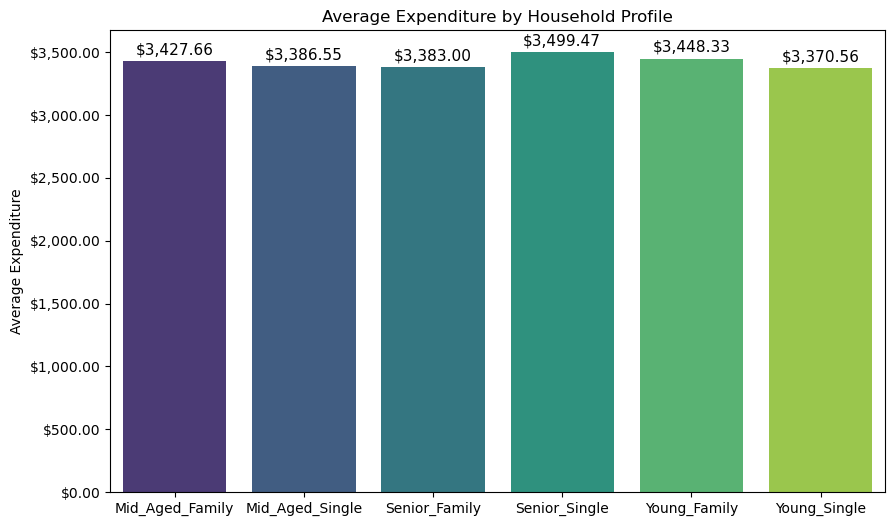

In [90]:
def dollar_formatter(x, pos):
    return f'${x:,.2f}'

# Plot Average Expenditure by Household Profile
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped, x='Household Profile', y='Avg Expenditure', palette='viridis')
plt.title('Average Expenditure by Household Profile')
plt.xlabel('')
plt.ylabel('Average Expenditure')
plt.gca().yaxis.set_major_formatter(dollar_formatter)  # Format y-axis as dollars

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'${height:,.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


#### Total Number of Orders by Household Profile with Average Order Value

In [119]:
# derive a subeset dataframe
orders = merge_active_custs[['user_id', 'household_profile', 'order_id', 'product_name', 'add_to_cart_order', 'prices']]
orders['total_order'] = merge_active_custs['add_to_cart_order'] * merge_active_custs['prices']

/var/folders/tj/gq9397w57h9_8h1v6ssn7y6w0000gn/T/ipykernel_19211/2265163418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['total_order'] = merge_active_custs['add_to_cart_order'] * merge_active_custs['prices']


In [120]:
orders

,user_id,household_profile,order_id,product_name,add_to_cart_order,prices,total_order
0,202279,Senior_Family,2,Organic Egg Whites,1,11.3,11.3
1,202279,Senior_Family,2,Michigan Organic Kale,2,13.4,26.8
2,202279,Senior_Family,2,Garlic Powder,3,3.6,10.8
3,202279,Senior_Family,2,Coconut Butter,4,8.4,33.6
4,202279,Senior_Family,2,Natural Sweetener,5,13.7,68.5
...,...,...,...,...,...,...,...
30959682,25247,Senior_Family,3421083,Free & Clear Natural Dishwasher Detergent,6,7.1,42.6
30959683,25247,Senior_Family,3421083,Organic Mini Sandwich Crackers Peanut Butter,7,2.8,19.6
30959684,25247,Senior_Family,3421083,All Natural French Toast Sticks,8,5.8,46.4
30959685,25247,Senior_Family,3421083,Banana,9,12.3,110.7


In [155]:
# Calculate the total expenditure and total orders per household profile
household_expenditure = orders.groupby('household_profile')['total_order'].sum().reset_index()
household_orders = orders.groupby('household_profile')['order_id'].count().reset_index()


In [156]:
# Merge the data to calculate average order value
household_analysis = pd.merge(household_expenditure, household_orders, on='household_profile')
household_analysis.columns = ['household_profile', 'total_expenditure', 'total_num_orders']
household_analysis

,household_profile,total_expenditure,total_num_orders
0,Mid_Aged_Family,497983697.0,7681926
1,Mid_Aged_Single,162367289.7,2530507
2,Senior_Family,603946575.2,9361540
3,Senior_Single,203423886.0,3144746
4,Young_Family,402273197.3,6177713
5,Young_Single,133374530.4,2063255


In [157]:
avg_order_value = orders.groupby('household_profile')['total_order'].mean()

In [158]:
avg_order_value

household_profile
Mid_Aged_Family    64.825370
Mid_Aged_Single    64.163936
Senior_Family      64.513592
Senior_Single      64.686905
Young_Family       65.116848
Young_Single       64.642776
Name: total_order, dtype: float64

In [159]:
household_analysis = pd.merge(household_analysis, avg_order_value, on='household_profile')
household_analysis.columns = ['household_profile', 'total_expenditure', 'total_num_orders', 'avg_order_value']

In [160]:
household_analysis

,household_profile,total_expenditure,total_num_orders,avg_order_value
0,Mid_Aged_Family,497983697.0,7681926,64.825370
1,Mid_Aged_Single,162367289.7,2530507,64.163936
2,Senior_Family,603946575.2,9361540,64.513592
3,Senior_Single,203423886.0,3144746,64.686905
4,Young_Family,402273197.3,6177713,65.116848
5,Young_Single,133374530.4,2063255,64.642776


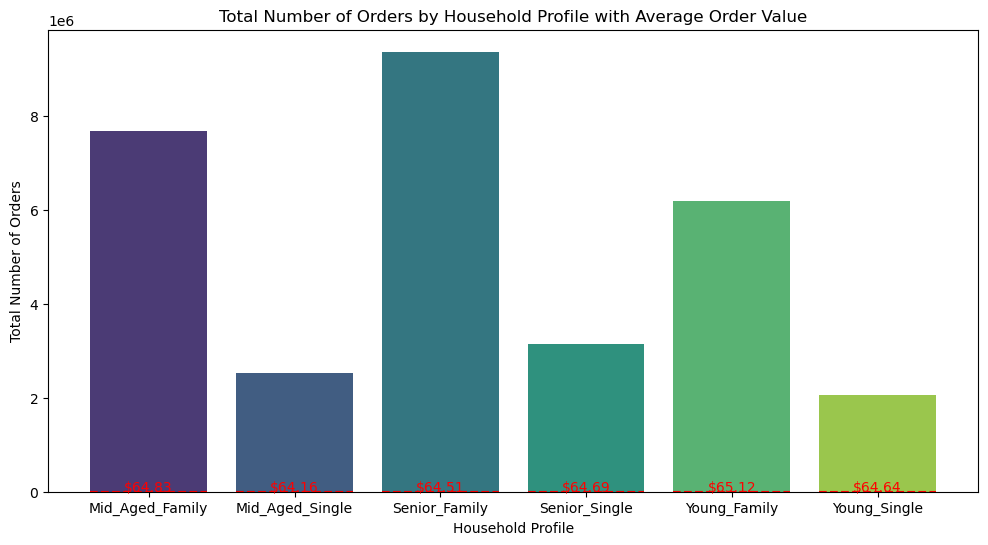

In [161]:
# Plot the total number of orders
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='household_profile', y='total_num_orders', data=household_analysis, palette='viridis')

# Add reference lines for average order value
for index, row in household_analysis.iterrows():
    ax.plot([index-0.4, index+0.4], [row['avg_order_value']] * 2, color='red', linestyle='--')
    ax.text(index, row['avg_order_value'] + 0.1, f"${row['avg_order_value']:.2f}", color='red', ha='center')

# Customizing the plot
plt.title('Total Number of Orders by Household Profile with Average Order Value')
plt.xlabel('Household Profile')
plt.ylabel('Total Number of Orders')
plt.show()

Let's create two separate charts for the total number of orders by household profile and the respective average order value

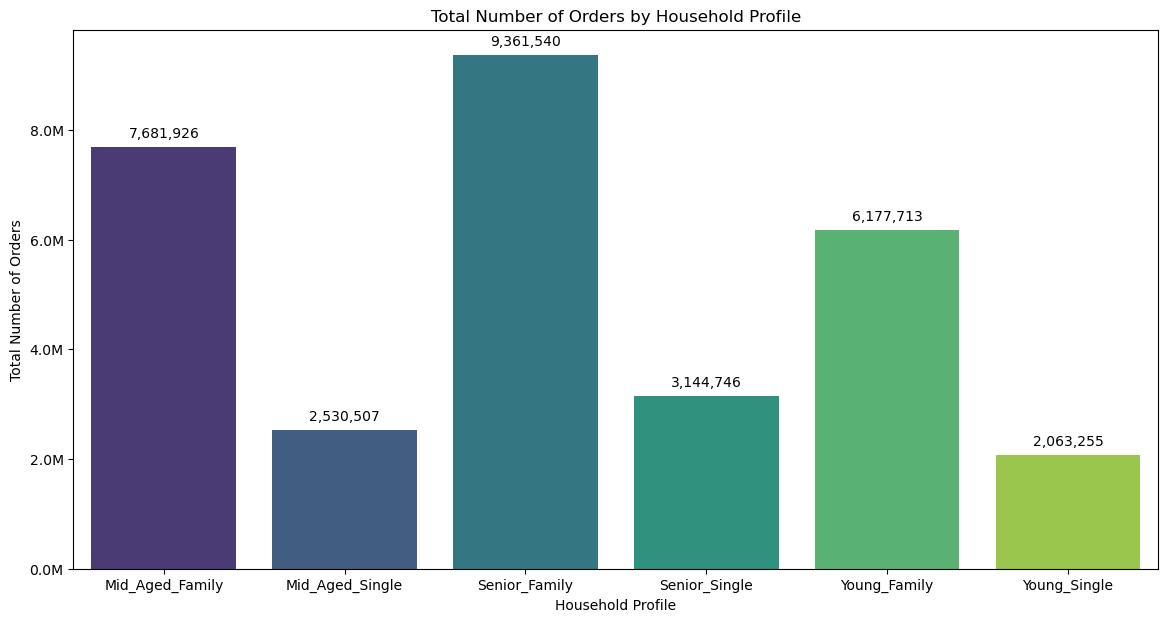

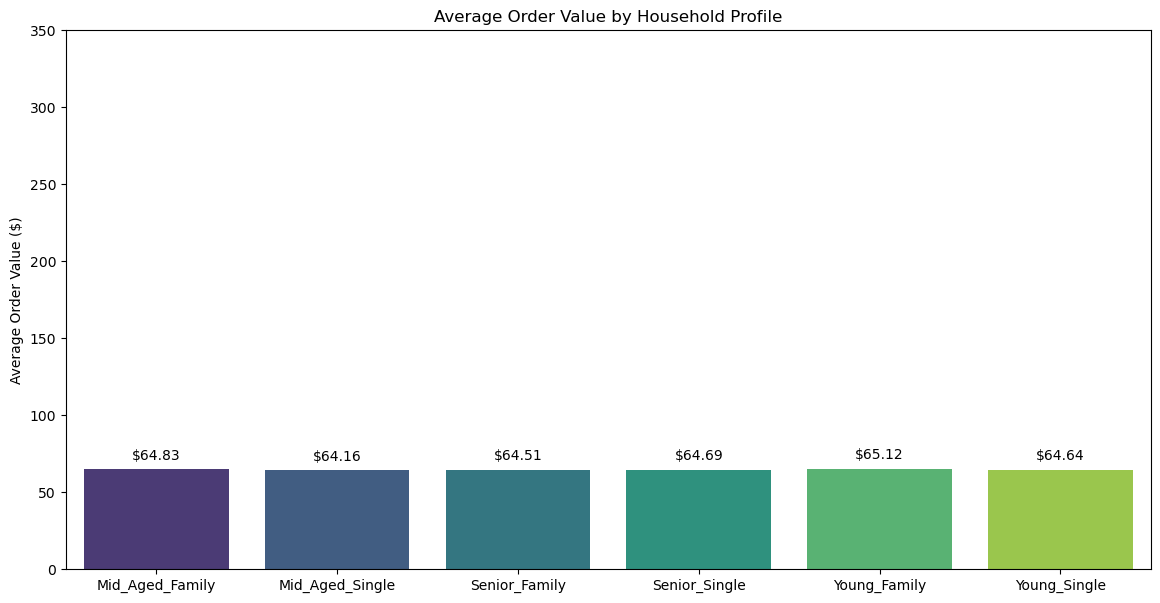

In [183]:
# Formatter function to format y-axis values in millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# Plot for Total Number of Orders
plt.figure(figsize=(14, 7))
ax1 = sns.barplot(x='household_profile', y='total_num_orders', data=household_analysis, palette='viridis')
ax1.set_title('Total Number of Orders by Household Profile')
ax1.set_xlabel('Household Profile')
ax1.set_ylabel('Total Number of Orders')
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

# Plot for Average Order Value
plt.figure(figsize=(14, 7))
ax2 = sns.barplot(x='household_profile', y='avg_order_value', data=household_analysis, palette='viridis')
ax2.set_title('Average Order Value by Household Profile')
ax2.set_xlabel('')
ax2.set_ylabel('Average Order Value ($)')
ax2.set_ylim(0, 350)  # Adjusting the y-axis limit to emphasize smaller dimension
for p in ax2.patches:
    ax2.annotate(f"${p.get_height():,.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

#### Top 5 Products by Household Profile

In [208]:
product_counts = merge_active_custs.groupby(['household_profile','product_name'])['order_id'].count().reset_index(name='Num_of_Orders')

In [209]:
product_counts

,household_profile,product_name,Num_of_Orders
0,Mid_Aged_Family,#2 Coffee Filters,182
1,Mid_Aged_Family,#2 Cone White Coffee Filters,1
2,Mid_Aged_Family,#2 Mechanical Pencils,2
3,Mid_Aged_Family,#4 Natural Brown Coffee Filters,73
4,Mid_Aged_Family,#NAME?,2
...,...,...,...
256261,Young_Single,with Xylitol Unwrapped Original Flavor 50 Stic...,2
256262,Young_Single,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,2
256263,Young_Single,with Xylitol Watermelon Twist 18 Sticks Sugar ...,13
256264,Young_Single,with a Splash of Mango Coconut Water,5


In [210]:
# Get the top 5 products for each household profile

# here the groupby is used to allow head(5) to pick the top 5 rows of each groups as opposed to the first 5 rows of the entire dataframe
top_products = product_counts.sort_values(by=['household_profile', 'Num_of_Orders'], ascending=[True, False]).groupby('household_profile').head(5)


In [211]:
top_products

,household_profile,product_name,Num_of_Orders
3431,Mid_Aged_Family,Banana,113671
3232,Mid_Aged_Family,Bag of Organic Bananas,90670
29910,Mid_Aged_Family,Organic Strawberries,62752
26947,Mid_Aged_Family,Organic Baby Spinach,57542
28342,Mid_Aged_Family,Organic Hass Avocado,50963
49317,Mid_Aged_Single,Banana,37001
49154,Mid_Aged_Single,Bag of Organic Bananas,30349
71604,Mid_Aged_Single,Organic Strawberries,20654
68922,Mid_Aged_Single,Organic Baby Spinach,19711
70190,Mid_Aged_Single,Organic Hass Avocado,16996


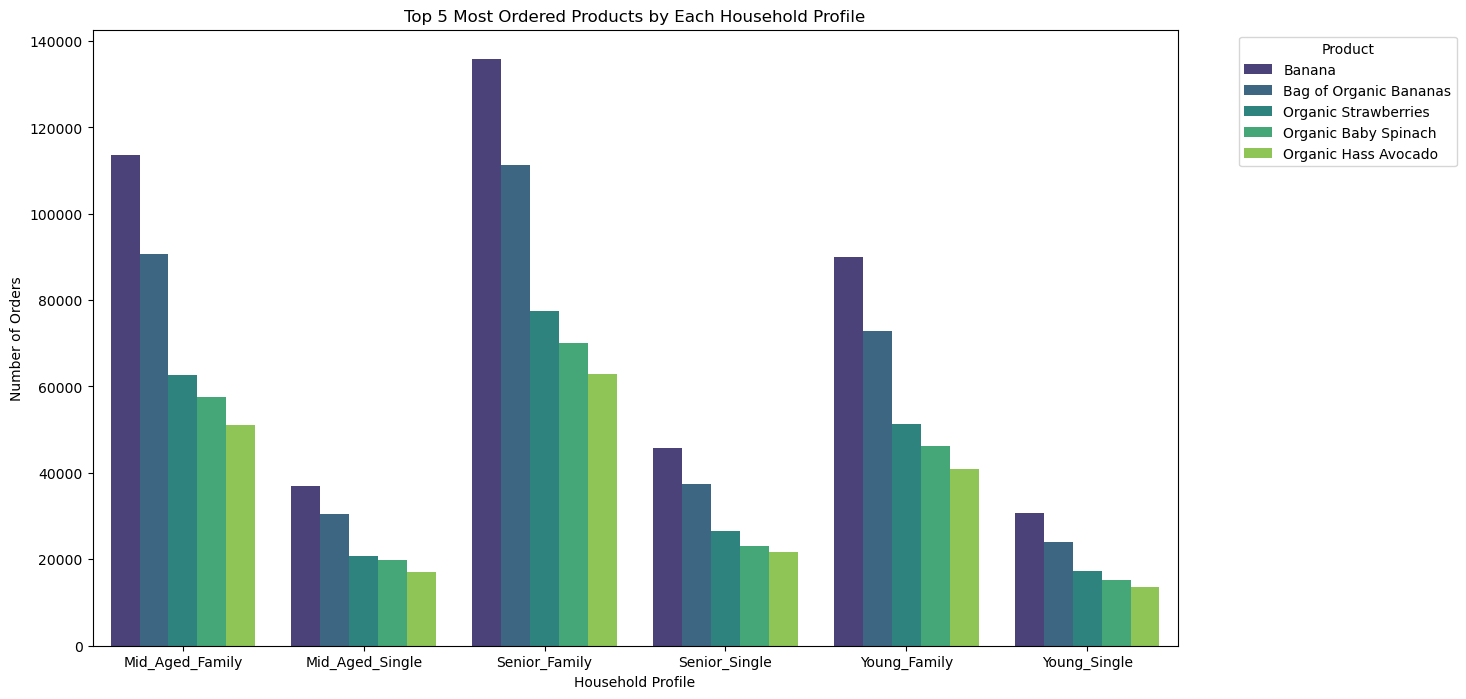

In [213]:
# Create a grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='household_profile', y='Num_of_Orders', hue='product_name', data=top_products, palette='viridis')

plt.title('Top 5 Most Ordered Products by Each Household Profile')
plt.xlabel('Household Profile')
plt.ylabel('Number of Orders')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Top 5 Products by Socio-Economic Status

In [217]:
product_counts = merge_active_custs.groupby(['socio-economic_class','product_name'])['order_id'].count().reset_index(name='Num_of_Orders')

In [219]:
product_counts

,socio-economic_class,product_name,Num_of_Orders
0,lower_class,#2 Coffee Filters,166
1,lower_class,#2 Cone White Coffee Filters,3
2,lower_class,#2 Mechanical Pencils,1
3,lower_class,#4 Natural Brown Coffee Filters,63
4,lower_class,#NAME?,7
...,...,...,...
142645,upper_class,with Xylitol Unwrapped Original Flavor 50 Stic...,19
142646,upper_class,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,28
142647,upper_class,with Xylitol Watermelon Twist 18 Sticks Sugar ...,20
142648,upper_class,with a Splash of Mango Coconut Water,8


In [220]:
top_products = product_counts.sort_values(by=['socio-economic_class', 'Num_of_Orders'], ascending=[True, False]).groupby('socio-economic_class').head(5)

In [221]:
top_products

,socio-economic_class,product_name,Num_of_Orders
3393,lower_class,Banana,100481
3199,lower_class,Bag of Organic Bananas,89380
29808,lower_class,Organic Strawberries,59646
26830,lower_class,Organic Baby Spinach,52599
28240,lower_class,Organic Hass Avocado,48095
49851,middle_class,Banana,152083
49655,middle_class,Bag of Organic Bananas,121416
77017,middle_class,Organic Strawberries,86428
74010,middle_class,Organic Baby Spinach,78650
75438,middle_class,Organic Hass Avocado,70299


#### Average Expenditure by Socio-Economic Class

In [230]:
avg_expenditure = merge_active_custs.groupby('socio-economic_class')['expenditure'].mean().reset_index()

In [231]:
avg_expenditure

,socio-economic_class,expenditure
0,lower_class,3168.266255
1,middle_class,3490.686166
2,upper_class,3504.020952


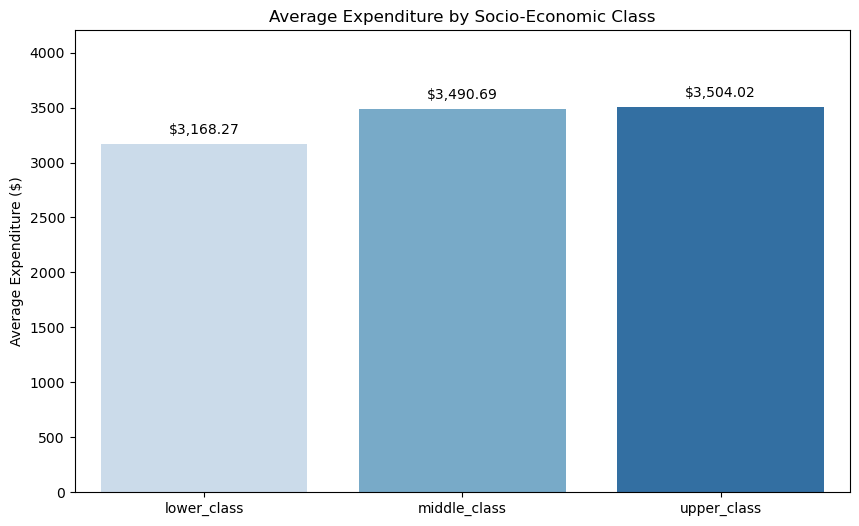

In [237]:
# Define the order of the socio-economic classes
order = ['lower_class', 'middle_class', 'upper_class']

# Create the bar plot with a custom palette of blue shades
palette = sns.color_palette("Blues", 3)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='socio-economic_class', y='expenditure', data=avg_expenditure, order=order, palette=palette)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Adjust y-axis limits to add more white space at the top
max_value = avg_expenditure['expenditure'].max()
ax.set_ylim(0, max_value * 1.2)

# Customizing the plot
plt.title('Average Expenditure by Socio-Economic Class')
plt.xlabel('')
plt.ylabel('Average Expenditure ($)')
plt.show()

#### Number of Users by State and Loyalty Status

In [246]:
df = merge_active_custs.groupby(['region', 'loyalty_flag'])['user_id'].nunique().reset_index()
df.columns = ['region', 'loyalty status', 'number of users']
df

,region,loyalty status,number of users
0,Midwest,loyal_customer,3991
1,Midwest,new_customer,16190
2,Midwest,regular_customer,18195
3,Northeast,loyal_customer,3027
4,Northeast,new_customer,12062
5,Northeast,regular_customer,13492
6,South,loyal_customer,5637
7,South,new_customer,22947
8,South,regular_customer,25609
9,West,loyal_customer,4362


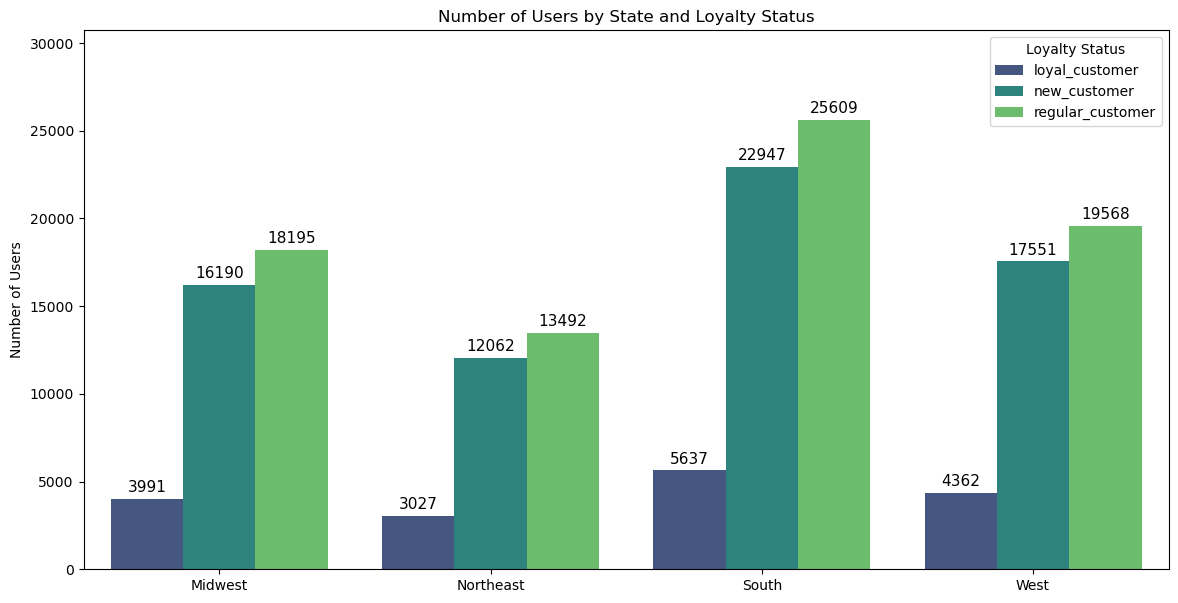

In [251]:



# Create the bar plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df, x='region', y='number of users', hue='loyalty status', palette='viridis')
plt.title('Number of Users by State and Loyalty Status')
plt.xlabel('')
plt.ylabel('Number of Users')
plt.legend(title='Loyalty Status')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
               textcoords='offset points')

# Adjust y-axis limits to add more white space at the top
max_value = df['number of users'].max()
ax.set_ylim(0, max_value * 1.2)

plt.show()